# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: undergrad 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation (you can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or search algorithms),
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import cProfile, pstats, io
pr = cProfile.Profile()
pr.enable()

import random as random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from numba import njit


# original
def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# with jit (cannot use some Python functions like sum)
@njit()
def comb2_jit(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

@njit()
def conflicts_jit(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
 
    cnt = [0] * (5 * n)
 
    for i in range(n):
        cnt[board[i]] += 1
        cnt[(n) + (i + board[i])] += 1
        cnt[(3 * n) + (i - board[i] + n)] += 1
 
    conflicts = 0
    for x in cnt:
        conflicts += comb2_jit(x)
 
    return conflicts


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

In [2]:
!which python

/opt/conda/bin/python


## Create a board

Board with 4 conflicts.


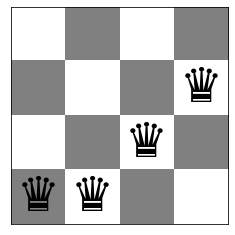

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [3]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


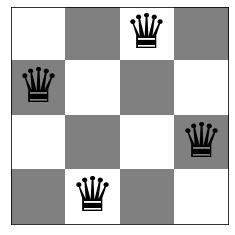

In [4]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

## (Steepest-ascend Hill Climbing Code)

Algorithm: Steepest-ascend Hill Climbing Search (SAHCS)
Board Size:  8 x 8
Status:  Incomplete Solution
Moves to Completion:  4
Board with 1 conflicts.


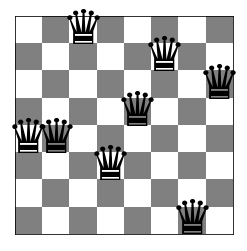

In [5]:
# Code and description go here
def SAHCS(board):
    current = board.copy()
    moves = 0
    while(True):
        neighbor = findBestSAHCS(current.copy())
        if(conflicts(neighbor) >= conflicts(current)):
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, conflicts(current)
        current = neighbor
        moves +=1
        
def findBestSAHCS(current):
    H = calculateHSAHCS(current)
    minimum = H.min()
    loc = np.where(H == minimum)
    current[loc[1][0]] = loc[0][0]
    return current
    
def calculateHSAHCS(current):
    n = len(current)
    H = np.zeros(shape=(n,n))
    for i in range(len(current)):
        temp = current.copy()
        for j in range(len(current)):
            temp[i] = j
            H[j, i] = conflicts(temp)
    return H
            
verbose = False
printResults = True
boardSize = 8
completeBoard, status, moves, result = SAHCS(random_board(boardSize))
if(printResults):print("Algorithm: Steepest-ascend Hill Climbing Search (SAHCS)")
if(printResults):print("Board Size: ", boardSize, "x", boardSize)
if(printResults):print("Status: ", status)    
if(printResults):print("Moves to Completion: ", moves)
if(printResults):show_board(completeBoard)

## Stochastic Hill Climbing 1 [2 Point]

Chooses randomly from among all uphill moves. Make the probability of the choice proportional to the steepness of the uphill move (i.e., with the improvement in conflicts). 

## (Stochastic Hill Climbing 1 Code)

Algorithm: Stochastic Hill Climbing (SHC1)
Board Size:  8 x 8
Status:  Incomplete Solution
Moves to Completion:  4
Board with 1 conflicts.


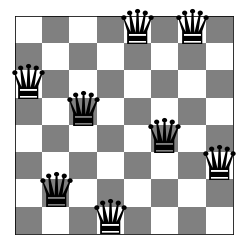

In [6]:
# Code and description go here
def SHC1(board):
    current = board.copy()
    moves = 0
    while(True):
        neighbor = findBestSHC1(current.copy())
        if(conflicts(neighbor) >= conflicts(current)):
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, conflicts(current)
        current = neighbor
        moves += 1
    
    
def findBestSHC1(current):
    currentConflicts = conflicts(current)
    H = calculateHSHC1(current)
    possibleConflicts = H[H<currentConflicts]
    choice = selectMoveSHC1(possibleConflicts.copy())
    if(choice == "Done"): 
        return current
    loc = np.where(H == choice)
    current[loc[1][0]] = loc[0][0]
    return current

def selectMoveSHC1(possibleConflicts):
    unique = np.unique(possibleConflicts)
    if(len(unique) == 0): return "Done"
    if(len(unique) == 1): return unique[0]
    probability = []
    for i in range(len(unique)):
        probability.append(unique[i]/np.sum(unique))
    probability = np.flip(probability)
    unique_int = unique.astype(int)
    choice = random.choices(unique_int, probability)
    return choice
    
def calculateHSHC1(current):
    N = len(current)
    H = np.zeros(shape=(N,N))
    for i in range(len(current)):
        temp = current.copy()
        for j in range(len(current)):
            temp[i] = j
            H[j, i] = conflicts(temp)
    return H
            
verbose = False
printResults = True
boardSize = 8
completeBoard, status, moves, result = SHC1(random_board(boardSize))
if(printResults):print("Algorithm: Stochastic Hill Climbing (SHC1)")
if(printResults):print("Board Size: ", boardSize, "x", boardSize)
if(printResults):print("Status: ", status)    
if(printResults):print("Moves to Completion: ", moves)
if(printResults):show_board(completeBoard)

## Stochastic Hill Climbing 2 [2 Point]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

## (Stochastic Hill Climbing 2 Code)

Algorithm: First-choice hill climbing (SHC2)
Board Size:  8 x 8
Status:  Complete Solution
Moves to Completion:  54
Board with 0 conflicts.


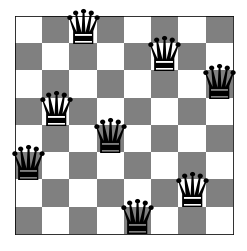

In [7]:
# Code and description go here
def SHC2(board):
    current = board.copy()
    moves = 0
    x = 0
    N = len(current)
    while(True):
        neighbor = current.copy()
        neighbor[random.randrange(N)] = random.randrange(N)
        cn = conflicts(neighbor)
        cc = conflicts(current)
        if(cn <= cc):
            current = neighbor
            moves += 1
            x = 0
        if((x >= N*N) or (cn == 0)):
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, cn
        x += 1
         
verbose = False
printResults = True
boardSize = 8
completeBoard, status, moves, result = SHC2(random_board(boardSize))
if(printResults):print("Algorithm: First-choice hill climbing (SHC2)")
if(printResults):print("Board Size: ", boardSize, "x", boardSize)
if(printResults):print("Status: ", status)    
if(printResults):print("Moves to Completion: ", moves)
if(printResults):show_board(completeBoard)


## Hill Climbing Search with Random Restarts [1 Point]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times with a new random initialization.

Board Sizes
[4, 6, 8, 10]
SAHCS Average Restarts
[0.0, 100.0, 100.0, 100.0]
SHC1 Average Restarts
[0.0, 100.0, 100.0, 100.0]
SHC2 Average Restarts
[0.0, 0.0, 0.0, 100.0]


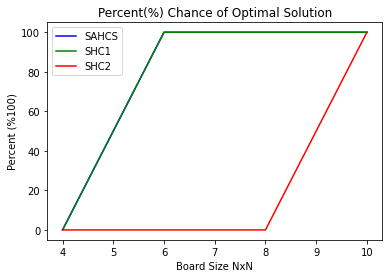

In [8]:
# Code and description go here
from matplotlib import pyplot as plt 
import time
startTime = time.time()

restartsSAHCS = []
restartsSHC1 = []
restartsSHC2 = []
sampleSize = 1
restarts = 1
verbose = False
boardSizes = [4,6,8,10]

for i in range(len(boardSizes)):
    totalSAHCS = []
    totalSHC1 = []
    totalSHC2 = []
    for j in range(sampleSize):
        sampleSAHCS, sampleSHC1, sampleSHC2 = 0, 0, 0
        for k in range(restarts):
            completeBoard, status, moves, result = SAHCS(random_board(boardSizes[i]))
            if(status == "Complete Solution"):
                break
            sampleSAHCS += 1

        for k in range(restarts):
            completeBoard, status, moves, result = SHC1(random_board(boardSizes[i]))
            if(status == "Complete Solution"):
                break
            sampleSHC1 += 1

        for k in range(restarts):
            completeBoard, status, moves, result = SHC2(random_board(boardSizes[i]))
            if(status == "Complete Solution"):
                break
            sampleSHC2 += 1
        totalSAHCS.append(sampleSAHCS)
        totalSHC1.append(sampleSHC1)
        totalSHC2.append(sampleSHC2)

    restartsSAHCS.append(np.average(totalSAHCS)*100)
    restartsSHC1.append(np.average(totalSHC1)*100)
    restartsSHC2.append(np.average(totalSHC2)*100)
print("Board Sizes")
print(boardSizes)
print("SAHCS Average Restarts")
print(restartsSAHCS)
print("SHC1 Average Restarts")
print(restartsSHC1)
print("SHC2 Average Restarts")
print(restartsSHC2)
 
# plotting
plt.title("Percent(%) Chance of Optimal Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent (%100)")
plt.plot(boardSizes, restartsSAHCS, color ="blue", label='SAHCS')
plt.plot(boardSizes, restartsSHC1, color ="green", label='SHC1')
plt.plot(boardSizes, restartsSHC2, color ="red", label='SHC2')
plt.legend()
plt.show()

## Compare Performance [2 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size?

* What is the largest board each algorithm can solve in a reasonable amount time?

The example below times creating 100 random boards and calculating the conflicts. Reported is the average run time over `N = 100` runs.

For timing you can use the `time` package.

In [9]:
import time

N = 100
total = 0

for i in range(N):
    t0 = time.time()
    for i in range(1,100): conflicts(random_board(8))
    t1 = time.time()
    total += t1 - t0

tm = total/N
    
print(f"This took: {tm * 1e3} milliseconds")

This took: 4.263889789581299 milliseconds


The `timit` package is useful to measure time for code that is called repeatedly.

In [10]:
import timeit

N = 100

tm = timeit.timeit('for i in range(1,100): conflicts(random_board(8))', 
                   globals = globals(), number = N)/N

print(f"This took: {tm * 1e3} milliseconds")

This took: 4.201967999979388 milliseconds


## Performance Compare Graphs
#### Sample Size = 50
#### Board Size N = 4 through 20

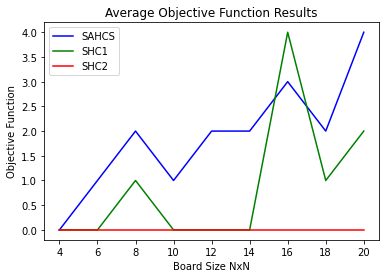

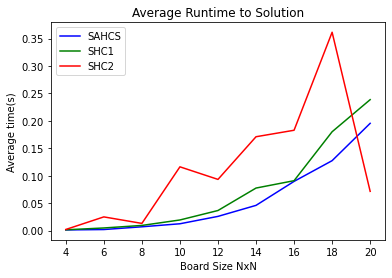

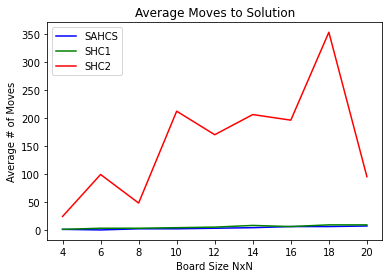

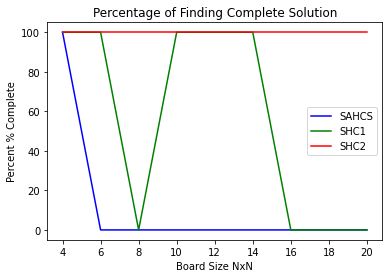

In [11]:
# Code, results, charts and discussion go here
import time
import timeit

#completeBoard, status, moves, result = SAHCS(board)
resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2 = 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2 = 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2 = 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, = 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SAHCS(random_board(boardSize))
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SHC1(random_board(boardSize))
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC2 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SHC2(random_board(boardSizes[i]))
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)

# plotting objective function results
plt.title("Average Objective Function Results")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, resultsSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, resultsSHC2, color ="red", label="SHC2")
plt.legend()
plt.show()

# plotting average time
plt.title("Average Runtime to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, timeSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, timeSHC2, color ="red", label="SHC2")
plt.legend()
plt.show()

#plotting average moves
plt.title("Average Moves to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, movesSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, movesSHC2, color ="red", label="SHC2")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Percentage of Finding Complete Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, completedSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, completedSHC2, color ="red", label="SHC2")
plt.legend()
plt.show()


## Performance Compare Discussion
__Notes and Observations__
* I found that using a sample size of atleast 50 was required to the large variation in performance by the algorithms. 
Algorithm Objective Function (Neighbor Selection)
* Steepest-ascend Hill Climbing: Automatically chooses the neighbor with the best objective function value
* Stochastic Hill Climbing: Chooses random neighbor with weights based on objective function value
* First-choice Hill climbing: Only generates one neighbor at a time until a better one is found.
Algorithm Termination
* Steepest-ascend Hill Climbing: When there are no neighbors with a better solution.
* Stochastic Hill Climbing: When there are no neighbors with a better solution.
* First-choice Hill climbing: Allowed to select N (board size) random neighbors before terminated

__How do the algorithms scale with problem size?__
* Steepest-ascend Hill Climbing: This algorithm was in the middle with regards to computation time as board size increases. This is because the "conflicts()" function is called for every square on the board in order to determin the next best move. With regards to finding the local omptima in the least amount of moves, this algorithm preformed the best. This is because it is a greedy local search that only grabs the best neighbor. If there are no better moves, the algorithm will immediately terminate saving computation time. 
* Stochastic Hill Climbing: This Algorithm scaled the worst out of these algorithms due to calling "conflicts()" for every neighbor as well the overhead required to calculate the probability of which neighbor to choose next. In certain state land scapes, this algorithm can find a better solution than Steepest-Ascend Hill Climbing as it does not grab the best neighbor without thinking ahead. 
* First-choice Hill climbing: This Algorithm scaled the best out of the three because it only generates one neighbor at a time until one is generated that is better than the current state. 

__What is the largest board each algorithm can solve in a reasonable amount time?__
- We will consider a "reasonable amount of time" to be less than 1 second.
- Based on Sample Sizes of 50 Boards
* Steepest-ascend Hill Climbing: 33 x 33 
* Stochastic Hill Climbing: 30 x 30
* First-choice Hill climbing: 43 x 43

## Graduate student advanced task: Simulated Annealing [1 Point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


Implement simulated annealing for the n-Queens problem and compare its performance with the previouse algorithms.

## (Simulated Annealing Code)

Algorithm: Simulated Annealing (SA)
Board Size:  8 x 8
Status:  Complete Solution
Moves to Completion:  357
Board with 0 conflicts.


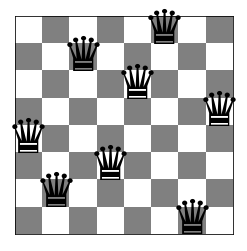

In [12]:
# Code and description go here
def SA(board, maxSteps):
    current = board.copy()
    moves = 0
    N = len(current)
    for step in range(maxSteps + 1):
        if(verbose):show_board(current)
        T = 1 - (step / float(maxSteps)) #Schedule
        if(T == 0.00): 
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, conflicts(current)
        if(conflicts(current) == 0):
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, conflicts(current)
        
        neighbor = current.copy()
        neighbor[random.randrange(N)] = random.randrange(N)
        E = conflicts(current) - conflicts(neighbor)
        if(verbose):print("Neighbor", neighbor)
        if(verbose):print("Current", current)
        if(verbose):print("E = ", E)
        if(verbose):print("T = ", T)
        R = random.random()
        if(verbose):print("if((E > 0) or (R < np.exp(E/T)))", R, "<", np.exp(E/T))
        if((E > 0) or (R < np.exp(E/T))):
            if(verbose):print("Neighbor Accepted")
            current = neighbor
            moves += 1
        else:
            if(verbose):print("Neighbor not Accepted")
            
verbose = False
printResults = True
boardSize = 8
completeBoard, status, moves, result = SA(random_board(boardSize), 1000)
if(printResults):print("Algorithm: Simulated Annealing (SA)")
if(printResults):print("Board Size: ", boardSize, "x", boardSize)
if(printResults):print("Status: ", status)    
if(printResults):print("Moves to Completion: ", moves)
if(printResults):show_board(completeBoard)

## Simulated Annealing Graph Comparison To Other Algorithms
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
# Simulated Annealing Graphs

resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA = 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA = 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA = 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA= 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SAHCS(random_board(boardSize))
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SHC1(random_board(boardSize))
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SHC2(random_board(boardSizes[i]))
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 1000)
        t1 = time.time()
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultSA += result
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)

# plotting objective function results
plt.title("Average Objective Function Results")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, resultsSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, resultsSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, resultsSA, color ="orange", label="SA")
plt.legend()
plt.show()

# plotting average time
plt.title("Average Runtime to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, timeSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, timeSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, timeSA, color ="orange", label="SA")
plt.legend()
plt.show()

#plotting average moves
plt.title("Average Moves to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, movesSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, movesSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, movesSA, color ="orange", label="SA")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Percentage of Finding Complete Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, completedSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, completedSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, completedSA, color ="orange", label="SA")
plt.legend()
plt.show()

In [ ]:
## Simulated Annealing Graph With Changing Schedule
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
#Simulated Annealing Graphs With Changing Schedule

resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA = 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA = 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA = 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA= 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 250)
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 500)
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 750)
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 1000)
        t1 = time.time()
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultSA += result
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)

# plotting objective function results
plt.title("Average Objective Function Results (Changing Schedule)")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="Schedule = 250")
plt.plot(boardSizes, resultsSHC1, color ="green", label="Schedule = 500")
plt.plot(boardSizes, resultsSHC2, color ="red", label="Schedule = 750")
plt.plot(boardSizes, resultsSA, color ="orange", label="Schedule = 1000")
plt.legend()
plt.show()

# plotting average time
plt.title("Average Runtime to Solution (Changing Schedule)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="Schedule = 250")
plt.plot(boardSizes, timeSHC1, color ="green", label="Schedule = 500")
plt.plot(boardSizes, timeSHC2, color ="red", label="Schedule = 750")
plt.plot(boardSizes, timeSA, color ="orange", label="Schedule = 1000")
plt.legend()
plt.show()

#plotting average moves
plt.title("Average Moves to Solution (Changing Schedule)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="Schedule = 250")
plt.plot(boardSizes, movesSHC1, color ="green", label="Schedule = 500")
plt.plot(boardSizes, movesSHC2, color ="red", label="Schedule = 750")
plt.plot(boardSizes, movesSA, color ="orange", label="Schedule = 1000")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Percentage of Finding Complete Solution (Changing Schedule)")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="Schedule = 250")
plt.plot(boardSizes, completedSHC1, color ="green", label="Schedule = 500")
plt.plot(boardSizes, completedSHC2, color ="red", label="Schedule = 750")
plt.plot(boardSizes, completedSA, color ="orange", label="Schedule = 1000")
plt.legend()
plt.show()

## Simulated Annealing Discussion 
__Notes and Observations__
* Simulated Annealing is a form of gradient descent where the algorithm can escape local optima through the ability to choose a random neighbor. If the neighbor improves upon the current, the move will always be accepted. However, the algorithm can also pick a random neighbor weighted by how bad the moves are. In addition to this, there is a "Temperature" value that starts hot when the algorithm starts and ends cold "0" when the algorithm terminates. The algorithms ability to choose a bad move is linked to the temperature. The lower the temperature, the smaller the probability allowed for choosing a bad moved. In the graphs above, I adjusted the temperature scheduler to see the affect on runtime, moves to solution and percentage chance of finding optimal solution. 
* Reducing initial temperature drastically improves runtime but impacts the ability to find the optimal solution. 

__Algorithm Objective Function (Neighbor Selection)__
* Simulated Annealing: Will automatically choose a neighbor if it improves upon current, but also has the ability to choose a random neighbor based on the probability of a temperature schedule that limits bad moves as the algorithm progresses. The probability of choosing a random neighbor is evalutated by the Boltzmann distribution (e^(E/T)) where E is the amount by which the evalutaion is worsened and T is the current Temperature. 

__Algorithm Termination__
* Simulated Annealing: Terminates when the temperature reaches 0 or if the optimal solution is found. This is determined by a schedule. There are different variations of scheduling temperatures. I used a linear temperature scheduler. 

__How does Simulated Annealing scale with problem size?__
* Simulated Annealing: This Algorithm scales the worst out of the 4 discussed so far. This is due to the high probability of choosing a random neighbor. The runtime is heavily dependent on the temperature scheduling provided. I provided a linear schedule that starts at 1000 and moves in increments of -.01.

__What is the largest board Simulated Annealing can solve in a reasonable amount time?__
We will consider a "reasonable amount of time" to be less than 1 second.
* Simulated Annealing: 173 x 173 (Using an initial temperature of 1000)


## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

## (Genetic Algorithm Code)

In [ ]:
# Code and description go here

def GA(board, populationSize, parentNum, mutationRate, maxGenerations):
    population = []
    current = board.copy()
    N = len(board)
    moves = 0
    for i in range(populationSize):
        population.append(random.sample(range(0,N), N))
    for i in range(len(population)):
        if(verbose):print("i:", population[i])                    
            
    while(True):
        if(verbose):show_board(current)
        population2 = []
        parents = getBestParents(population, parentNum)
        children = reproduce(parents, populationSize, N)
        population2 = mutate(children, mutationRate, N)
        current, solution = solutionCheck(population2)
        if((solution) or (moves == maxGenerations)):
            if(conflicts(current) == 0): status = "Complete Solution"
            else: status = "Incomplete Solution"
            return current, status, moves, conflicts(current)
        population = population2
        moves += 1
    
def getBestParents(population, parentNum):
    fitness = []
    parents = []
    for i in range(len(population)):
        fitness.append(conflicts(population[i]))
        if(verbose):print(conflicts(population[i]), "|", population[i])
    for i in range(parentNum):
        minValue = min(fitness)
        minIndex = fitness.index(minValue)
        parents.append(population.pop(minIndex))
        if(verbose):print("Parent(", i, ")", fitness[minIndex], "|", parents[i])
        fitness.pop(minIndex)
    return parents

def reproduce(parents, populationSize, N):
    children = []
    for i in range(populationSize):
        c = random.randrange(N-2)+1
        parent1 = parents[random.randrange(len(parents))]
        parent2 = parents[random.randrange(len(parents))]
        if(verbose):print("c = ", c)
        children.append(parent1[:c] + parent2[-(N-c):])
        child = parent1[:c] + parent2[-(N-c):]####
        if(verbose):print(" P1:", parent1[:c], " P2:", parent2[-(N-c):])
        if(verbose):print("Child( ", i ,")", child)
        if(len(children) == populationSize):
            if(verbose):print("population size reached: ", len(children))
            break
    return children

def mutate(children, mutationRate, N):
    for i in range(len(children)):
        R = random.random()
        if(R < mutationRate):
            if(verbose):print("Mutating Child: ", i)
            if(verbose):print("Before: ", children[i])
            children[i][random.randrange(N)] = random.randrange(N)
            if(verbose):print("After: ", children[i])
    return children

def solutionCheck(population2):
    fitness = []
    for i in range(len(population2)):
        fitness.append(conflicts(population2[i]))
    if 0 in fitness:
        minValue = min(fitness)
        minIndex = fitness.index(minValue)
        current = population2[minIndex]
        return current, True
    else:
        minValue = min(fitness)
        minIndex = fitness.index(minValue)
        current = population2[minIndex]
        return current, False        
        
                

verbose = False
printResults = True
boardSize = 8
completeBoard, status, moves, result = GA(random_board(boardSize), 40, 10, .2, 1000)
if(printResults):print("Algorithm: Simulated Annealing (GA)")
if(printResults):print("Board Size: ", boardSize, "x", boardSize)
if(printResults):print("Status: ", status)    
if(printResults):print("Moves to Completion: ", moves)
if(printResults):show_board(completeBoard)

## Genetic Algorithm With Changing Population Size Graphs
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
#Genetic Algorithm Changing Population Size Graphs
resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA = 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA = 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA = 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA= 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 10, 10, .5, 100)
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, .5, 100)
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 30, 10, .5, 100)
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 40, 10, .5, 100)
        t1 = time.time()
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultSA += result
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)
    
# plotting objective function results
plt.title("Average Objective Function Results (Changing Population Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="Population Size = 10")
plt.plot(boardSizes, resultsSHC1, color ="green", label="Population Size = 20")
plt.plot(boardSizes, resultsSHC2, color ="red", label="Population Size = 30")
plt.plot(boardSizes, resultsSA, color ="orange", label="Population Size = 40")
plt.legend()
plt.show()

# plotting average time
plt.title("Genetic Algorithm Runtime (Changing Population Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="Population Size = 10")
plt.plot(boardSizes, timeSHC1, color ="green", label="Population Size = 20")
plt.plot(boardSizes, timeSHC2, color ="red", label="Population Size = 30")
plt.plot(boardSizes, timeSA, color ="orange", label="Population Size = 40")
plt.legend()
plt.show()

#plotting average moves
plt.title("Genetic Algorithm Steps (Changing Population Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="Population Size = 10")
plt.plot(boardSizes, movesSHC1, color ="green", label="Population Size = 20")
plt.plot(boardSizes, movesSHC2, color ="red", label="Population Size = 30")
plt.plot(boardSizes, movesSA, color ="orange", label="Population Size = 40")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Genetic Algorithm Solution% (Changing Population Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="Population Size = 10")
plt.plot(boardSizes, completedSHC1, color ="green", label="Population Size = 20")
plt.plot(boardSizes, completedSHC2, color ="red", label="Population Size = 30")
plt.plot(boardSizes, completedSA, color ="orange", label="Population Size = 40")
plt.legend()
plt.show()

## Genetic Algorithm With Changing ParentSize Graphs
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
#Genetic Algorithm Changing ParentSize Graphs
resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA = 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA = 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA = 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA= 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 4, .5, 100)
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 8, .5, 100)
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 12, .5, 100)
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 16, .5, 100)
        t1 = time.time()
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultSA += result
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)

# plotting objective function results
plt.title("Average Objective Function Results (Changing Parent Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="Parent Size = 4")
plt.plot(boardSizes, resultsSHC1, color ="green", label="Parent Size = 8")
plt.plot(boardSizes, resultsSHC2, color ="red", label="Parent Size = 12")
plt.plot(boardSizes, resultsSA, color ="orange", label="Parent Size = 16")
plt.legend()
plt.show()

# plotting average time
plt.title("Genetic Algorithm Runtime (Changing Parent Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="Parent Size = 4")
plt.plot(boardSizes, timeSHC1, color ="green", label="Parent Size = 8")
plt.plot(boardSizes, timeSHC2, color ="red", label="Parent Size = 12")
plt.plot(boardSizes, timeSA, color ="orange", label="Parent Size = 16")
plt.legend()
plt.show()

#plotting average moves
plt.title("Genetic Algorithm Steps (Changing Parent Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="Parent Size = 4")
plt.plot(boardSizes, movesSHC1, color ="green", label="Parent Size = 8")
plt.plot(boardSizes, movesSHC2, color ="red", label="Parent Size = 12")
plt.plot(boardSizes, movesSA, color ="orange", label="Parent Size = 16")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Genetic Algorithm Solution% (Changing Parent Size)")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="Parent Size = 4")
plt.plot(boardSizes, completedSHC1, color ="green", label="Parent Size = 8")
plt.plot(boardSizes, completedSHC2, color ="red", label="Parent Size = 12")
plt.plot(boardSizes, completedSA, color ="orange", label="Parent Size = 16")
plt.legend()
plt.show()

## Genetic Algorithm With Changing Mutation Rate Graphs
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
#Genetic Algorithm Changing Mutation Rate Graphs
resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []

#sampleSize = 10
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA = 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA = 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA = 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA= 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, 0, 100)
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, .25, 100)
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, .75, 100)
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, 1.0, 100)
        t1 = time.time()
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultSA += result
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)

# plotting objective function results
plt.title("Average Objective Function Results (Changing Mutation Rate)")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="Mutation Rate = 0.0")
plt.plot(boardSizes, resultsSHC1, color ="green", label="Mutation Rate = 0.25")
plt.plot(boardSizes, resultsSHC2, color ="red", label="Mutation Rate = 0.75")
plt.plot(boardSizes, resultsSA, color ="orange", label="Mutation Rate = 1.0")
plt.legend()
plt.show()

# plotting average time
plt.title("Genetic Algorithm Runtime (Changing Mutation Rate)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="Mutation Rate = 0.0")
plt.plot(boardSizes, timeSHC1, color ="green", label="Mutation Rate = 0.25")
plt.plot(boardSizes, timeSHC2, color ="red", label="Mutation Rate = 0.75")
plt.plot(boardSizes, timeSA, color ="orange", label="Mutation Rate = 1.0")
plt.legend()
plt.show()

#plotting average moves
plt.title("Genetic Algorithm Moves (Changing Mutation Rate)")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="Mutation Rate = 0.0")
plt.plot(boardSizes, movesSHC1, color ="green", label="Mutation Rate = 0.25")
plt.plot(boardSizes, movesSHC2, color ="red", label="Mutation Rate = 0.75")
plt.plot(boardSizes, movesSA, color ="orange", label="Mutation Rate = 1.0")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Genetic Algorithm Solution% (Changing Mutation Rate)")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="Mutation Rate = 0.0")
plt.plot(boardSizes, completedSHC1, color ="green", label="Mutation Rate = 0.25")
plt.plot(boardSizes, completedSHC2, color ="red", label="Mutation Rate = 0.75")
plt.plot(boardSizes, completedSA, color ="orange", label="Mutation Rate = 1.0")
plt.legend()
plt.show()

## Genetic Algorithm Discussion
__Notes and Observations__
* A genetic algorithm uses a population of states to breed offspring with the purpose of improving upon the previous generation. There are many forms of genetic algorithms but this is how I wrote mine. The initial population is generated randomly. The population is then graded by the objective function. The best performing specimen get to become parents in the next generation. The algorithm takes the parents and randomly selects a place to splice them two parents together to form a child. This is repeated until the next generation is the same size as the previous. The children or "new generation" are then subjected to the random chance of a mutation occuring. After this step, the new generation is evaluated by the objective function and the process repeats until the optimal solution is found or the max number of generations is reached. I have added the ability to control population size, number of parents and mutation probability. The results of varying these parameters are shown in the graphs above. 

__Algorithm Objective Function (Parent Selection)__
* Genetic Algorithm: This algorithm evaluates each specimen in the population and then selects the top specimens to be parents for the next generation. The amount of selected specimens selected to be parents can be modified by the parent size parameter.

__Algorithm Termination__
* Genetic Algorithm: If there is a specimen in the current population with the optimal solution the program will terminate. Otherwise it will iterate through the generations until the max generation parameter is reached. 

__How does Simulated Annealing scale with problem size?__
* Genetic Algorithm: This algorithm follows a similar scale to simulated annealing. It appears to be headed towards a limit as the board size expands. I think that is why both simulated annealing and genetic algorithms are better at finding the optimal solution in large spaces. 

__What is the largest board Simulated Annealing can solve in a reasonable amount time?__
- We will consider a "reasonable amount of time" to be less than 1 second.
* Genetic Algorithm: 247 x 247 (Using population_size = 20 , parent_size = 10 , mutation_rate = 0.5 )

## All Algorithms Graphical Comparison
#### Sample Size = 50
#### Board Size N = 4 through 20

In [ ]:
#All Graphs
resultsSAHCS = []
resultsSHC1 = []
resultsSHC2 = []
resultsSA = []
results GA = []
timeSAHCS = []
timeSHC1 = []
timeSHC2 = []
timeSA = []
timeGA = []
movesSAHCS = []
movesSHC1 = []
movesSHC2 = []
movesSA = []
movesGA = []
completedSAHCS = []
completedSHC1 = []
completedSHC2 = []
completedSA = []
completedGA = []

#sampleSize = 50
boardSizes = [4,6,8,10,12,14,16,18,20]
for i in range(len(boardSizes)):
    boardSize = boardSizes[i]
    resultSAHCS, resultSHC1, resultSHC2, resultSA, resultGA = 0, 0, 0, 0, 0
    totalSAHCS, totalSHC1, totalSHC2, totalSA, totalGA = 0, 0, 0, 0, 0   
    moveSAHCS, moveSHC1, moveSHC2, moveSA, moveGA = 0, 0, 0, 0, 0   
    completeSAHCS, completeSHC1, completeSHC2, completeSA, completeGA= 0, 0, 0, 0, 0
    
    #SAHCS Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SAHCS(random_board(boardSize))
        t1 = time.time()
        resultSAHCS += result
        totalSAHCS += t1 - t0
        moveSAHCS += moves
        if(result == 0): completeSAHCS += 1
    resultsSAHCS.append(resultSAHCS/sampleSize)
    timeSAHCS.append((totalSAHCS/sampleSize))
    movesSAHCS.append(moveSAHCS/sampleSize)
    completedSAHCS.append((completeSAHCS/sampleSize)*100)
  
    #SHC1 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SHC1(random_board(boardSize))
        t1 = time.time()
        resultSHC1 += result
        totalSHC1 += t1 - t0
        moveSHC1 += moves
        if(result == 0): completeSHC1 += 1
    resultsSHC1.append(resultSHC1/sampleSize)
    timeSHC1.append((totalSHC1/sampleSize))
    movesSHC1.append(moveSHC1/sampleSize)
    completedSHC1.append((completeSHC1/sampleSize)*100)

    #SHC12 Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
            completeBoard, status, moves, result = SHC2(random_board(boardSizes[i]))
        t1 = time.time()
        resultSHC2 += result
        totalSHC2 += t1 - t0
        moveSHC2 += moves
        if(result == 0): completeSHC2 += 1
    resultsSHC2.append(resultSHC2/sampleSize)
    timeSHC2.append((totalSHC2/sampleSize))
    movesSHC2.append(moveSHC2/sampleSize)
    completedSHC2.append((completeSHC2/sampleSize)*100)
   
    #SA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = SA(random_board(boardSize), 1000)
        t1 = time.time()
        resultSA += result
        totalSA += t1 - t0
        moveSA += moves
        if(result == 0): completeSA += 1
    resultsSA.append(resultSA/sampleSize)
    timeSA.append((totalSA/sampleSize))
    movesSA.append(moveSA/sampleSize)
    completedSA.append((completeSA/sampleSize)*100)
    
    #GA Timing
    for j in range(0,sampleSize): 
        t0 = time.time()
        completeBoard, status, moves, result = GA(random_board(boardSize), 20, 10, .5, 100)
        t1 = time.time()
        resultGA += result
        totalGA += t1 - t0
        moveGA += moves
        if(result == 0): completeGA += 1
    resultsGA.append(resultGA/sampleSize)
    timeGA.append((totalGA/sampleSize))
    movesGA.append(moveGA/sampleSize)
    completedGA.append((completeGA/sampleSize)*100)
    
# plotting objective function results
plt.title("Average Objective Function Results")
plt.xlabel("Board Size NxN")
plt.ylabel("Objective Function")
plt.plot(boardSizes, resultsSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, resultsSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, resultsSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, resultsSA, color ="orange", label="SA")
plt.plot(boardSizes, resultsGA, color ="purple", label="GA")
plt.legend()
plt.show()

# plotting average time
plt.title("Average Runtime to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average time(s)")
plt.plot(boardSizes, timeSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, timeSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, timeSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, timeSA, color ="orange", label="SA")
plt.plot(boardSizes, timeGA, color ="purple", label="GA")
plt.legend()
plt.show()

#plotting average moves
plt.title("Average Moves to Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Average # of Moves")
plt.plot(boardSizes, movesSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, movesSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, movesSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, movesSA, color ="orange", label="SA")
plt.plot(boardSizes, movesGA, color ="purple", label="GA")
plt.legend()
plt.show()

#plotting Percentage of Complete Solution
plt.title("Percentage of Finding Complete Solution")
plt.xlabel("Board Size NxN")
plt.ylabel("Percent % Complete")
plt.plot(boardSizes, completedSAHCS, color ="blue", label="SAHCS")
plt.plot(boardSizes, completedSHC1, color ="green", label="SHC1")
plt.plot(boardSizes, completedSHC2, color ="red", label="SHC2")
plt.plot(boardSizes, completedSA, color ="orange", label="SA")
plt.plot(boardSizes, completedGA, color ="purple", label="GA")
plt.legend()
plt.show()


In [ ]:
pr.disable()
s = io.StringIO()
sortby = 'cumulative'
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())